In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
df=pd.read_csv("tvmarketing.csv");

In [5]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [9]:
# 1
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [13]:
# df.info()
df.dtypes

TV       float64
Sales    float64
dtype: object

In [17]:
# /3
df.shape

(200, 2)

In [19]:
# 4

df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

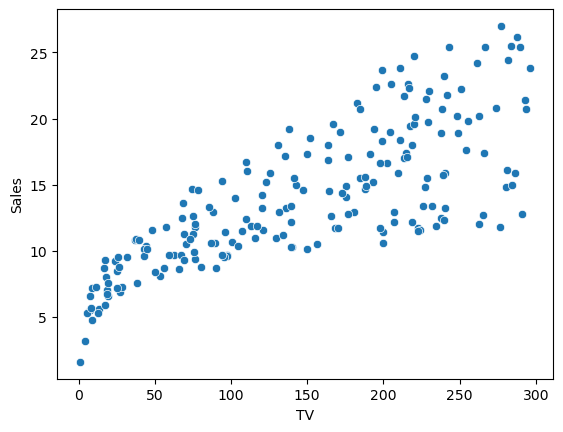

In [23]:
sns.scatterplot(data=df,x='TV',y='Sales')

In [25]:

X=df.drop(columns=['Sales'])
y=df['Sales']

In [27]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [29]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [41]:
# 8
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((140, 1), (60, 1), (140,), (60,))

In [166]:
x_mean=X_train.mean()
y_mean=y_train.mean()
type(x_mean)
x_mean.values[0]

pandas.core.series.Series

In [47]:
n=X_train.size

In [59]:
n


140

In [79]:
print(X_train.iloc[0])

TV    220.5
Name: 142, dtype: float64


In [107]:
numerator=sum((X_train.iloc[i]-x_mean)*(y_train.iloc[i]-y_mean) for i in range(n))
deominator=sum((X_train.iloc[i]-x_mean)**2 for i in range(n))



In [156]:
slope=numerator/deominator
print(slope)
intercept=y_mean-slope*x_mean
print(intercept)

TV    0.047552
dtype: float64
TV    7.013144
dtype: float64


In [172]:
y_pedect=[intercept+slope*X_test.iloc[i] for i in range(X_test.size)]
yp=pd.DataFrame(y_pedect)
yp

,TV
0,11.492501
1,16.304720
2,13.808262
3,15.805428
4,9.057861
5,7.935644
6,15.106420
7,13.247154
8,17.954759
9,17.588612


In [150]:
y_pred_list = [val.values[0] for val in y_pedect]

In [152]:
y_pred_list

[11.492501375791461,
 16.304719534872795,
 13.808262485942262,
 15.805428125086689,
 9.057861358548731,
 7.935644475600909,
 15.106420151386137,
 13.247154044468349,
 17.954758765308785,
 17.58861173146564,
 17.81685923308215,
 9.975606521298431,
 17.39840548011855,
 16.100247814674674,
 7.208105564198297,
 8.767796825244421,
 9.747359019681925,
 15.948082813597004,
 9.847217301639146,
 18.50635689421534,
 14.778314367812412,
 20.498767377076092,
 15.215788745910714,
 13.5705046717584,
 8.287526040593022,
 9.557152768334838,
 19.514450026354908,
 9.138699015371243,
 18.430274393676505,
 18.824952365221712,
 13.275684982170413,
 11.587604501465005,
 17.032258446275407,
 19.438367525816076,
 17.322322979579717,
 20.337092063431065,
 15.020827338279949,
 16.85156250749567,
 16.200106096631895,
 14.017489362424058,
 13.442115452099115,
 19.157813305079117,
 16.48066031736885,
 15.805428125086689,
 13.399319045546022,
 17.664694232004475,
 10.303712304872159,
 8.82010354436487,
 7.046430250

In [178]:
# liner Regression 
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train,y_train)


LinearRegression()

In [253]:
y_predict=model.predict(X_test)
y_predict

array([11.49250138, 16.30471953, 13.80826249, 15.80542813,  9.05786136,
        7.93564448, 15.10642015, 13.24715404, 17.95475877, 17.58861173,
       17.81685923,  9.97560652, 17.39840548, 16.10024781,  7.20810556,
        8.76779683,  9.74735902, 15.94808281,  9.8472173 , 18.50635689,
       14.77831437, 20.49876738, 15.21578875, 13.57050467,  8.28752604,
        9.55715277, 19.51445003,  9.13869902, 18.43027439, 18.82495237,
       13.27568498, 11.5876045 , 17.03225845, 19.43836753, 17.32232298,
       20.33709206, 15.02082734, 16.85156251, 16.2001061 , 14.01748936,
       13.44211545, 19.15781331, 16.48066032, 15.80542813, 13.39931905,
       17.66469423, 10.3037123 ,  8.82010354,  7.04643025, 18.33992642,
       19.0817308 , 16.40933297, 15.42977078,  9.3907223 , 20.17066159,
       17.48875345, 10.58426653,  7.56949744, 12.23430576,  7.41257728])

In [208]:
model.coef_,model.intercept_


(array([0.04755156]), 7.013144156567526)

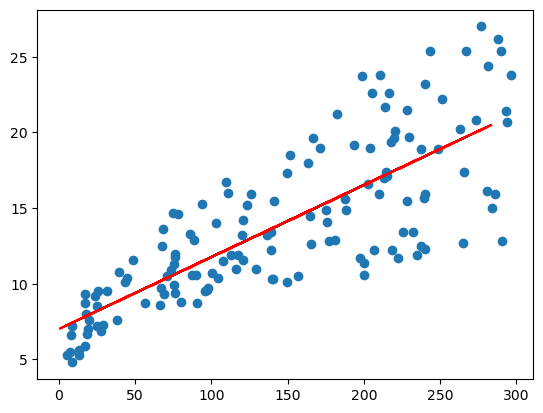

In [239]:
plt.scatter(x=X_train['TV'],y=y_train)
# plt.plot(X_train['TV'],model.predict(X_train),color='red')
plt.plot(X_test,y_pedect,color='red')


In [260]:
from sklearn.metrics import mean_squared_error,r2_score

In [245]:
mean_squared_error(y_test,y_predict)

11.639862455074956

In [249]:
r2_score(y_test,y_predict)

0.5750684311959491